# Lab 5: Bagging, Random Forest, and Boosting

The notebook builds upon previous Lab's notebook and ISLP tutorial.

We import some of our usual libraries at this top
level.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

We also  collect the new imports
needed for this lab.

In [5]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.ensemble import \
     (RandomForestClassifier as RFC,
      GradientBoostingClassifier as GBC,
      AdaBoostClassifier as ABC)
from sklearn.metrics import (accuracy_score,
                             log_loss, 
                             confusion_matrix,
                             ConfusionMatrixDisplay)

## Loading, preparing, and splitting data

We use the dataset *Predict students' dropout and academic success* from UCI ML repository, see https://archive.ics.uci.edu/dataset/697/ 

In [6]:
data = pd.read_csv('data.csv', sep=';')
data.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3936,1,1,1,9130,1,1,106.0,1,37,37,...,0,5,9,4,11.000000,0,9.4,-0.8,-3.12,Dropout
2815,1,17,1,9238,1,1,132.0,1,37,38,...,0,6,10,6,11.714286,0,15.5,2.8,-4.06,Graduate
329,1,1,1,9085,1,1,135.0,1,19,38,...,0,5,7,5,11.600000,0,9.4,-0.8,-3.12,Enrolled
3155,1,1,2,9147,1,1,130.0,1,37,37,...,0,5,9,3,11.333333,0,7.6,2.6,0.32,Enrolled
1708,1,39,1,9556,1,19,133.1,1,19,1,...,0,7,11,4,13.125000,1,15.5,2.8,-4.06,Dropout


The last column `Target` is the target variable as its name suggests. Possible values are *dropout, enrolled, graduate*. We'll need feature names for visualizations.

In [7]:
features = list(data.columns)
classes = set(data['Target'])
X = data.drop('Target', axis=1)
y = data['Target']

We split the data into train (80%) and test (20%) subsets with stratification.

In [8]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_split, X_validation, y_train_split, y_validation = skm.train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)


## Bagging

Here we apply bagging using
the `RandomForestRegressor()` from the `sklearn.ensemble` package. Recall
that bagging is simply a special case of a random forest with
$m=p$. Therefore, the `RandomForestRegressor()`  function can be used to
perform both bagging and random forests. 

In [9]:
print(X_train.shape())
clf = RFC(criterion='entropy', max_features=X_train.shape[1], random_state=42)

Train and test the classifier.

In [10]:
clf = clf.fit(X_train, y_train)
print('Train set accuracy: %.4f' % accuracy_score(y_train, clf.predict(X_train)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

Train set accuracy: 1.0000
Test set accuracy: 0.7864


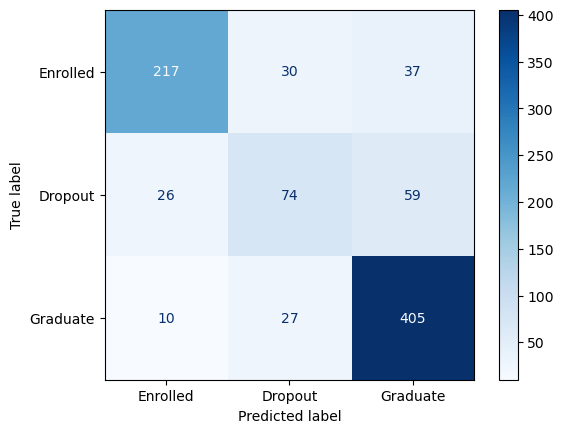

In [11]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
    )

You can visualize the decision tree -- as an image or in text mode.

## Random forest

Now we define a Random Forest Classifier with 
$\sqrt{p}$ features. 

In [12]:
clf = RFC(criterion='entropy',max_features="sqrt", random_state=0)
clf = clf.fit(X_train, y_train)
print('Train set accuracy: %.4f' % accuracy_score(y_train, clf.predict(X_train)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

Train set accuracy: 1.0000
Test set accuracy: 0.7808


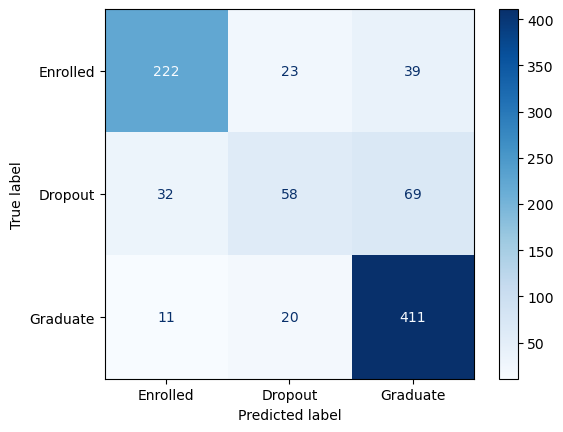

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
    )

## Boosting

Finally, we define an AdaBoost classifier with `learning_rate = 0.1`. Other parameters are default, see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [14]:
clf = ABC(learning_rate=0.1, random_state=0)
clf = clf.fit(X_train, y_train)
print('Train set accuracy: %.4f' % accuracy_score(y_train, clf.predict(X_train)))
print('Test set accuracy: %.4f' % accuracy_score(y_test, clf.predict(X_test)))

c:\Users\DhM\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train set accuracy: 0.7338
Test set accuracy: 0.7412


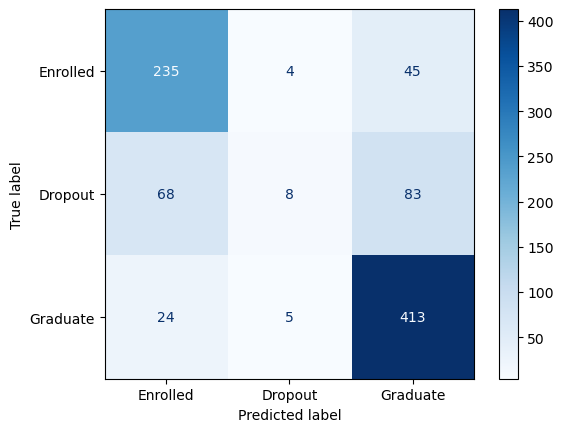

In [15]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=classes,
        cmap=plt.cm.Blues,
    )